In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error as mse, r2_score, recall_score, f1_score

In [ ]:
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
print(df.head())
df.info()
df.describe()

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
print("No. of missing values: \n", df.isnull().sum())

No. of missing values: 
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
df.drop(['CustomerId'], axis=1, inplace=True)


In [ ]:
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

In [ ]:
y = df.IsActiveMember.values

In [ ]:
df = pd.get_dummies(df)

In [ ]:
X = df.drop(["IsActiveMember"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
print("Mean-squared error using KNN:", mse(y_test, knn_pred))
print("Accuracy with KNN:", accuracy_score(y_test, knn_pred))
print("R2 Score:", r2_score(y_test, knn_pred))
print("Recall Score:", recall_score(y_test, knn_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, knn_pred, average='weighted'))

Mean-squared error using KNN: 0.4935
Accuracy with KNN: 0.5065
R2 Score: -0.9808954972258432
Recall Score: 0.5065
F1 Score: 0.5056403038288872


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
print("Mean-squared error using KNN:", mse(y_test, knn_pred))
print("Accuracy with KNN:", accuracy_score(y_test, knn_pred))
print("R2 Score:", r2_score(y_test, knn_pred))
print("Recall Score:", recall_score(y_test, knn_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, knn_pred, average='weighted'))


Mean-squared error using KNN: 0.4935
Accuracy with KNN: 0.5065
R2 Score: -0.9808954972258432
Recall Score: 0.5065
F1 Score: 0.5056403038288872


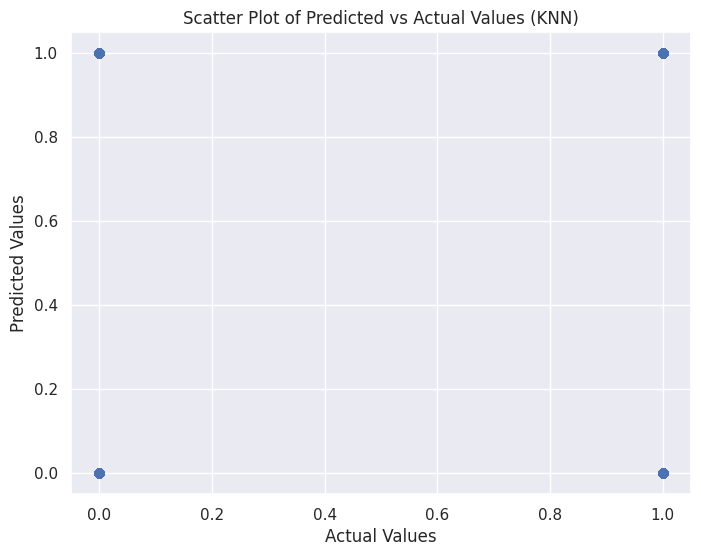

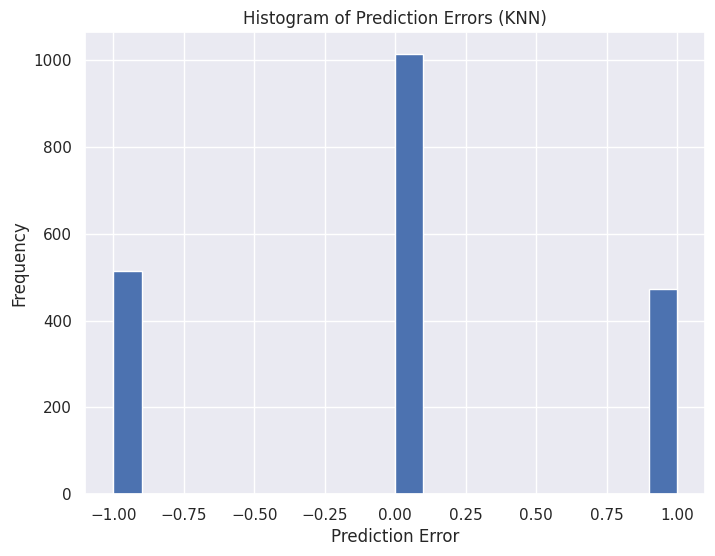

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs Actual Values (KNN)")
plt.show()

errors = y_test - knn_pred
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors (KNN)")
plt.show()


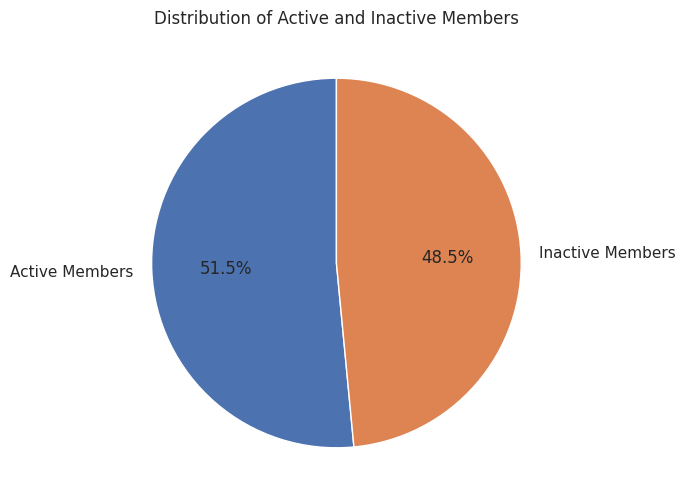

In [ ]:
active_members = df['IsActiveMember'].value_counts()[1]
inactive_members = df['IsActiveMember'].value_counts()[0]

labels = ['Active Members', 'Inactive Members']
sizes = [active_members, inactive_members]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Active and Inactive Members')
plt.show()
